In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings('ignore')

In [4]:
# matplotlib rebuild
import matplotlib as mpl
mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [6]:
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [21]:
df_list = [fdr.DataReader(code, '2019-01-01', '2020-10-07')['Close'] for name, code in stock_list]
len(df_list)

8

In [22]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,38750,60600,114000,204879,337000,237000,104000,118000
2019-01-03,37600,57700,116500,201058,328000,237000,104500,122000
2019-01-04,37450,58300,119500,210132,330500,239000,107000,125500
2019-01-07,38750,58700,120500,206311,343000,246000,108000,131500
2019-01-08,38100,59200,119500,203923,349500,245500,107000,130000
2019-01-09,39600,63600,123000,204401,352000,255500,109000,133000
2019-01-10,39800,65300,123000,206789,347000,258500,108500,131000
2019-01-11,40500,65100,123000,206789,349000,255500,109000,131000
2019-01-14,40050,62100,121500,201536,350500,250000,109500,127000


<AxesSubplot:xlabel='Date'>

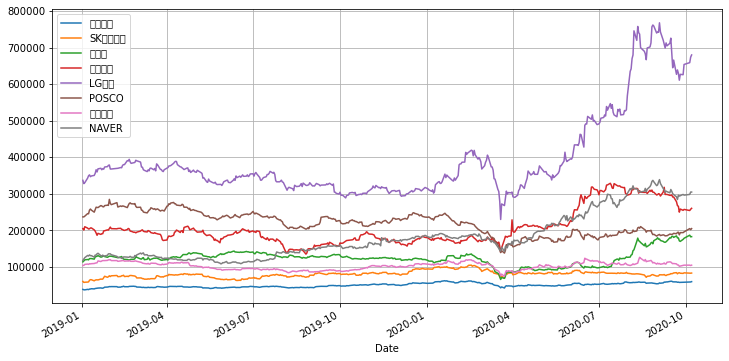

In [23]:
df.plot()

<AxesSubplot:xlabel='Date'>

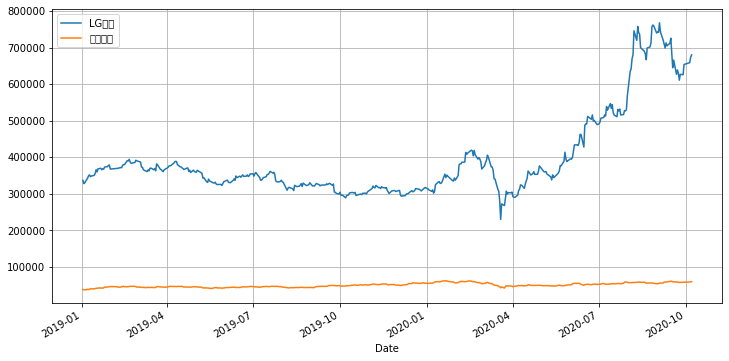

In [24]:
df[['LG화학', '삼성전자']].plot()

<AxesSubplot:xlabel='Date'>

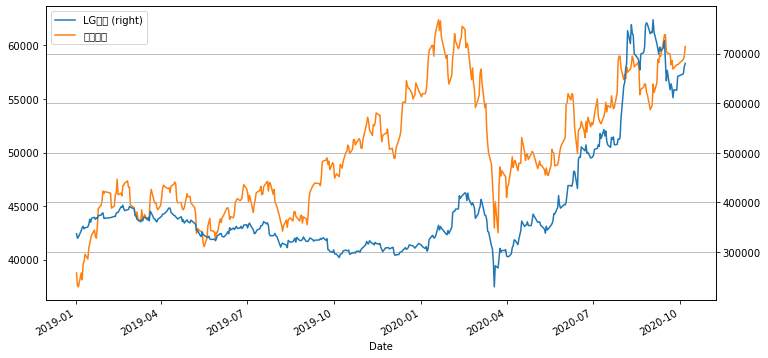

In [25]:
df[['LG화학', '삼성전자']].plot(secondary_y=['LG화학'])

<AxesSubplot:xlabel='Date'>

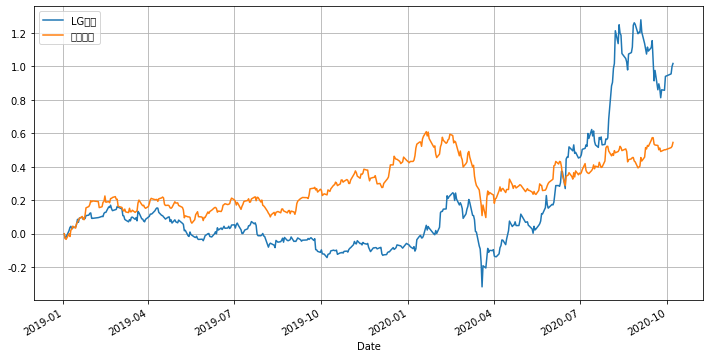

In [26]:
df2 = df[['LG화학', '삼성전자']]

df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

<AxesSubplot:xlabel='Date'>

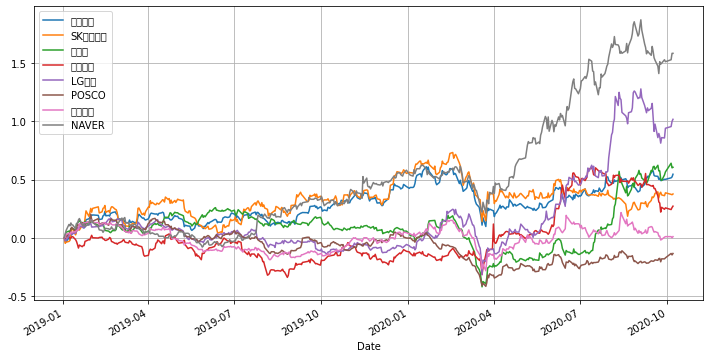

In [29]:
df_norm = df / df.iloc[0] - 1
df_norm.plot()

In [30]:
df_norm

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.029677,-0.047855,0.021930,-0.018650,-0.026706,0.000000,0.004808,0.033898
2019-01-04,-0.033548,-0.037954,0.048246,0.025640,-0.019288,0.008439,0.028846,0.063559
2019-01-07,0.000000,-0.031353,0.057018,0.006989,0.017804,0.037975,0.038462,0.114407
2019-01-08,-0.016774,-0.023102,0.048246,-0.004666,0.037092,0.035865,0.028846,0.101695
...,...,...,...,...,...,...,...,...
2020-09-28,0.501935,0.361386,0.539474,0.244637,0.857567,-0.181435,0.004808,1.529661
2020-09-29,0.501935,0.386139,0.565789,0.256839,0.940653,-0.172996,0.009615,1.512712
2020-10-05,0.514839,0.372937,0.640351,0.242197,0.955490,-0.135021,0.009615,1.529661


In [28]:
df_norm.iloc[-1].sort_values(ascending=False)

NAVER     1.584746
LG화학      1.017804
현대차       0.605263
삼성전자      0.545806
SK하이닉스    0.376238
셀트리온      0.271482
삼성물산      0.009615
POSCO    -0.135021
Name: 2020-10-07 00:00:00, dtype: float64